**Tabular Playground Series by Kaggle**

***

December 2021

***

**Created by Berkay Alan**

## Case

**Dataset:**

https://www.kaggle.com/c/tabular-playground-series-dec-2021

***

**Description**

For this competition, you will be predicting a binary target based on 100 feature columns given in the data. All columns are continuous.

The data is synthetically generated by a GAN that was trained on a real-world dataset used to identify spam emails via various extracted features from the email.

Files
train.csv - the training data with the target column
test.csv - the test set; you will be predicting the target for each row in this file (the probability of the binary target)
sample_submission.csv - a sample submission file in the correct format

***

**Columns**

Elevation - Elevation in meters

Aspect - Aspect in degrees azimuth

Slope - Slope in degrees

Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features

Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features

Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway

Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice

Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice

Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice

Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points

Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation

Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation

Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1 - Rawah Wilderness Area

2 - Neota Wilderness Area

3 - Comanche Peak Wilderness Area

4 - Cache la Poudre Wilderness Area

The soil types are:

1 Cathedral family - Rock outcrop complex, extremely stony.

2 Vanet - Ratake families complex, very stony.

3 Haploborolis - Rock outcrop complex, rubbly.

4 Ratake family - Rock outcrop complex, rubbly.

5 Vanet family - Rock outcrop complex complex, rubbly.

6 Vanet - Wetmore families - Rock outcrop complex, stony.

7 Gothic family.

8 Supervisor - Limber families complex.

9 Troutville family, very stony.

10 Bullwark - Catamount families - Rock outcrop complex, rubbly.

11 Bullwark - Catamount families - Rock land complex, rubbly.

12 Legault family - Rock land complex, stony.

13 Catamount family - Rock land - Bullwark family complex, rubbly.

14 Pachic Argiborolis - Aquolis complex.

15 unspecified in the USFS Soil and ELU Survey.

16 Cryaquolis - Cryoborolis complex.

17 Gateview family - Cryaquolis complex.

18 Rogert family, very stony.

19 Typic Cryaquolis - Borohemists complex.

20 Typic Cryaquepts - Typic Cryaquolls complex.

21 Typic Cryaquolls - Leighcan family, till substratum complex.

22 Leighcan family, till substratum, extremely bouldery.

23 Leighcan family, till substratum - Typic Cryaquolls complex.

24 Leighcan family, extremely stony.

25 Leighcan family, warm, extremely stony.

26 Granile - Catamount families complex, very stony.

27 Leighcan family, warm - Rock outcrop complex, extremely stony.

28 Leighcan family - Rock outcrop complex, extremely stony.

29 Como - Legault families complex, extremely stony.

30 Como family - Rock land - Legault family complex, extremely stony.

31 Leighcan - Catamount families complex, extremely stony.

32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.

33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.

34 Cryorthents - Rock land complex, extremely stony.

35 Cryumbrepts - Rock outcrop - Cryaquepts complex.

36 Bross family - Rock land - Cryumbrepts complex, extremely stony.

37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.

38 Leighcan - Moran families - Cryaquolls complex, extremely stony.

39 Moran family - Cryorthents - Leighcan family complex, extremely stony.

40 Moran family - Cryorthents - Rock land complex, extremely stony.


## Importing Libraries

In [3]:
import requests
import json
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import matplotlib.image as mping
from xgboost import XGBClassifier
from matplotlib import font_manager as fm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import time
from skompiler import skompile
from joblib import dump, load
from tqdm import tqdm
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Functions

In [5]:
def label_encoder(dataframe,column):
    le = preprocessing.LabelEncoder()
    dataframe[column] = le.fit_transform(list(dataframe[column].values))
    return dataframe[column]

In [6]:
def addFeature(X):
    # Thanks @mpwolke : https://www.kaggle.com/mpwolke/tooezy-where-are-you-no-camping-here
    X["Soil_Count"] = X[soil_features].apply(sum, axis=1)

    # Thanks @yannbarthelemy : https://www.kaggle.com/yannbarthelemy/tps-december-first-simple-feature-engineering
    X["Wilderness_Area_Count"] = X[wilderness_features].apply(sum, axis=1)
    X["Hillshade_mean"] = X[features_Hillshade].mean(axis=1)
    X['amp_Hillshade'] = X[features_Hillshade].max(axis=1) - X[features_Hillshade].min(axis=1)

## Reading Files

In [225]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [226]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,4873,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,5423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,5269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,2866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,2642,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2


In [227]:
train.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3999995,3999995,2954,34,25,51,65,6314,240,237,103,1618,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3999996,3999996,2926,104,8,696,83,5427,210,216,150,2863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3999997,3999997,2911,144,1,509,58,4820,195,192,91,92,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
3999998,3999998,2580,178,17,376,86,2592,225,183,39,1374,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3999999,3999999,3083,136,4,44,9,1675,213,197,205,1612,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [228]:
train.shape

(4000000, 56)

In [229]:
train["Id"].nunique()

4000000

In [230]:
train.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [231]:
train["Elevation"].value_counts()

2829    5292
2789    5285
2803    5258
2815    5253
2799    5247
        ... 
1799       1
1798       1
4286       1
4266       1
4275       1
Name: Elevation, Length: 2525, dtype: int64

In [232]:
train["Cover_Type"].value_counts()

2    2262087
1    1468136
3     195712
7      62261
6      11426
4        377
5          1
Name: Cover_Type, dtype: int64

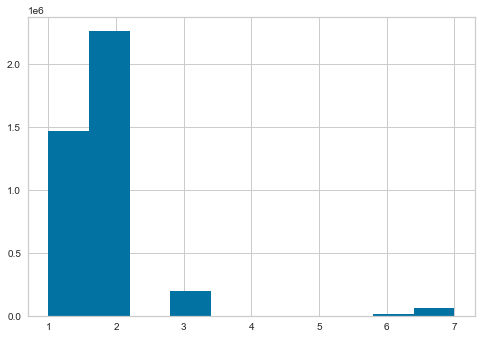

In [233]:
train["Cover_Type"].hist();

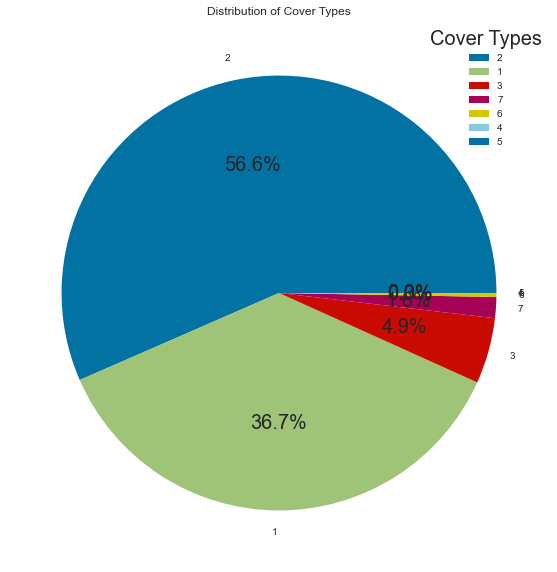

In [234]:
plt.figure(figsize=(10,10))

plt.rcParams['font.size'] = 20

plt.pie(train["Cover_Type"].value_counts().values,labels=train["Cover_Type"].value_counts().index, autopct="%1.1f%%")

plt.legend(title="Cover Types")

plt.title("Distribution of Cover Types")

plt.show()

In [235]:
test.shape

(1000000, 55)

In [236]:
test.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


## Exploratory Data Analysis

In [237]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,4873,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,5423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,5269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,2866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,2642,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2


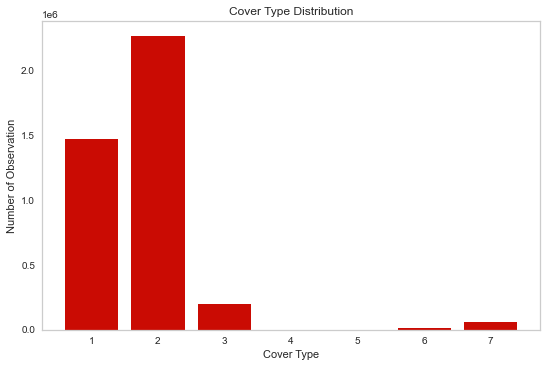

In [238]:
plt.bar(train.Cover_Type.value_counts().keys(),train.Cover_Type.value_counts().values,color="r")

plt.title("Cover Type Distribution")
plt.xlabel("Cover Type")
plt.ylabel("Number of Observation")

plt.tight_layout()
plt.grid(False)

plt.show()

## Feature Engineering

### Aspect

Aspect is the compass direction that a terrain faces. Here it is expressed in Sexagesimal system where the angle lies in the range (0, 359) degrees. In this feature, however, there are some values which are less than 0 and some values which are greater than 359. It will be better If we fix those values so that It lies in the given range. This is fairly easy to do in this case because upon a closer inspection you will find that all the values in this column lies in the range (-360, 720). So, adding 360 to angles smaller than 0 and subtracting 360 from angles greater than 359 will do the work. This is how it should be:

[Credit](https://www.kaggle.com/c/tabular-playground-series-dec-2021/discussion/293373)

In [239]:
train["Aspect"][train["Aspect"] < 0] += 360
train["Aspect"][train["Aspect"] > 359] -= 360

test["Aspect"][test["Aspect"] < 0] += 360
test["Aspect"][test["Aspect"] > 359] -= 360

### Hillshade

The next three features are the Hillshade features. Hillshade, basically, is a 3D representation of a surface. Hillshade is created by measuring luminosity of certain patches of a terrain that results when a source of light is casted at a particular angle. It's a shade of grey so all the values must lie in the range (0, 255) which is also what the data description in the original competition says. However, In both train and test datasets, there are certain rows with hillshade value more than 255 or less than 0. This may be the result of recording error. It seems that the negative values refer to the darkest shade, which has the value of 0, and the values greater then 255 refer to brightest shade, which has the value of 255 and, hence, It would be better to replace all the negative values with 0 and values greater than 255 with 255. Here is how it should be:

[Credit](https://www.kaggle.com/c/tabular-playground-series-dec-2021/discussion/293373)

In [240]:
train.loc[train["Hillshade_9am"] < 0, "Hillshade_9am"] = 0
test.loc[test["Hillshade_9am"] < 0, "Hillshade_9am"] = 0

train.loc[train["Hillshade_Noon"] < 0, "Hillshade_Noon"] = 0
test.loc[test["Hillshade_Noon"] < 0, "Hillshade_Noon"] = 0

train.loc[train["Hillshade_3pm"] < 0, "Hillshade_3pm"] = 0
test.loc[test["Hillshade_3pm"] < 0, "Hillshade_3pm"] = 0

train.loc[train["Hillshade_9am"] > 255, "Hillshade_9am"] = 255
test.loc[test["Hillshade_9am"] > 255, "Hillshade_9am"] = 255

train.loc[train["Hillshade_Noon"] > 255, "Hillshade_Noon"] = 255
test.loc[test["Hillshade_Noon"] > 255, "Hillshade_Noon"] = 255

train.loc[train["Hillshade_3pm"] > 255, "Hillshade_3pm"] = 255
test.loc[test["Hillshade_3pm"] > 255, "Hillshade_3pm"] = 255

In [241]:
features_Hillshade = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']
soil_features = [x for x in train.columns if x.startswith("Soil_Type")]
wilderness_features = [x for x in train.columns if x.startswith("Wilderness_Area")]

In [242]:
addFeature(train)
addFeature(test)

[Credit](https://www.kaggle.com/chryzal/features-engineering-for-you)

### Soil

In [243]:
train.drop(["Soil_Type7", "Id", "Soil_Type15"], axis=1, inplace=True)
test.drop(["Soil_Type7", "Id", "Soil_Type15"], axis=1, inplace=True)

In [244]:
train = train[train.Cover_Type != 5]

### Creating distance based features

In [245]:
# Manhhattan distance to Hydrology
train["mnhttn_dist_hydrlgy"] = np.abs(train["Horizontal_Distance_To_Hydrology"]) + np.abs(train["Vertical_Distance_To_Hydrology"])
test["mnhttn_dist_hydrlgy"] = np.abs(test["Horizontal_Distance_To_Hydrology"]) + np.abs(test["Vertical_Distance_To_Hydrology"])

# Euclidean distance to Hydrology
train["ecldn_dist_hydrlgy"] = (train["Horizontal_Distance_To_Hydrology"]**2 + train["Vertical_Distance_To_Hydrology"]**2)**0.5
test["ecldn_dist_hydrlgy"] = (test["Horizontal_Distance_To_Hydrology"]**2 + test["Vertical_Distance_To_Hydrology"]**2)**0.5

## Scaling the Data

In [246]:
X_train = train.drop("Cover_Type",axis=1).values
y_train = train.Cover_Type.values

In [247]:
X_train

array([[3.18900000e+03, 4.00000000e+01, 8.00000000e+00, ...,
        4.10000000e+01, 4.30000000e+01, 3.26955654e+01],
       [3.02600000e+03, 1.82000000e+02, 5.00000000e+00, ...,
        1.34000000e+02, 3.09000000e+02, 2.81497780e+02],
       [3.10600000e+03, 1.30000000e+01, 7.00000000e+00, ...,
        9.70000000e+01, 3.88000000e+02, 3.52944755e+02],
       ...,
       [2.91100000e+03, 1.44000000e+02, 1.00000000e+00, ...,
        1.04000000e+02, 5.67000000e+02, 5.12293861e+02],
       [2.58000000e+03, 1.78000000e+02, 1.70000000e+01, ...,
        1.86000000e+02, 4.62000000e+02, 3.85709735e+02],
       [3.08300000e+03, 1.36000000e+02, 4.00000000e+00, ...,
        1.60000000e+01, 5.30000000e+01, 4.49110231e+01]])

In [248]:
sc = RobustScaler()
train_scaled = sc.fit_transform(X_train)

In [249]:
test_scaled = sc.transform(test)

## Logistic Regression

In [217]:
logistic_regression = LogisticRegression(random_state=0,solver="liblinear").fit(train_scaled,y_train)

In [218]:
logistic_regression

LogisticRegression(random_state=0, solver='liblinear')

In [73]:
#saving the model
#dump(logistic_regression,"logistic_Regression_model.joblib")

In [219]:
logistic_regression.intercept_

array([ -2.20860876,   0.80678672, -11.23573414, -14.65252631,
        -7.47300629,  -6.65389728])

In [220]:
logistic_regression.coef_[:1]

array([[ 6.59392435e+00,  9.36391803e-03,  5.31650156e-03,
         6.44522321e-01, -2.93194325e-01,  3.32217814e-01,
         4.93269543e-02, -7.44407621e-03,  7.56685776e-02,
         3.54150906e-02,  2.39255681e-01,  2.19335035e-01,
        -7.52098962e-01,  2.98487414e-02, -5.55031947e-02,
        -9.75612961e-02,  7.39711065e-02, -1.70135964e-01,
        -1.49821165e-01,  5.56739972e-02, -8.57974433e-02,
        -1.28480973e-01, -1.14437026e-02, -1.23698067e-01,
        -1.33686280e-01, -1.28759397e-01, -5.25955542e-03,
         6.76110651e-03,  1.07521734e-01, -1.26710847e-02,
         6.35280695e-02,  4.41634324e-02,  3.17196125e-02,
         8.01870347e-01,  2.98400113e-01,  3.60514534e-02,
        -2.53201613e-02,  1.69199449e-02,  1.27301208e-02,
         2.70338267e-02,  1.78988141e-01,  1.62610221e-01,
        -1.01379849e-01, -1.93862134e-01, -1.57435044e-01,
        -7.50425305e-02, -2.83616180e-01, -1.65538252e-01,
        -2.57537298e-01, -2.48701723e-01, -8.11170394e-0

In [221]:
y_pred = logistic_regression.predict(test_scaled)

In [222]:
pd.DataFrame(y_pred).value_counts()

2    527328
1    414110
3     54705
6      3359
7       484
4        14
dtype: int64

In [223]:
sample_submission.Cover_Type = y_pred

In [224]:
sample_submission.to_csv("logreg_submission.csv",index=False)

## Neural Networks

In [258]:
clf = MLPClassifier(solver='adam', alpha=0.001,hidden_layer_sizes=(10, 3),
                    max_iter=150,activation="tanh", random_state=1)

In [259]:
start_time = time.time()

clf.fit(train_scaled,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for Neural Networks: "
      f"{elapsed_time:.3f} seconds")

Elapsed time for Neural Networks: 711.019 seconds


In [260]:
y_pred = clf.predict(test_scaled)

In [261]:
pd.DataFrame(y_pred).value_counts()

2    504810
1    395500
3     83068
7     14883
6      1739
dtype: int64

In [262]:
sample_submission.Cover_Type = y_pred

In [263]:
sample_submission.to_csv("neural_networks_submission.csv",index=False)

## Random Forests

In [105]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [106]:
start_time = time.time()

clf.fit(train_scaled,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for Random Forests: "
      f"{elapsed_time:.3f} seconds")

RandomForestClassifier(max_depth=2, random_state=0)

In [107]:
y_pred = clf.predict(test_scaled)

In [108]:
pd.DataFrame(y_pred).value_counts()

2    686383
1    313617
dtype: int64

In [109]:
sample_submission.Cover_Type = y_pred

In [110]:
sample_submission.to_csv("random_forests_submission.csv",index=False)

## Xgboost - The Best Score

In [26]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Soil_Count,Wilderness_Area_Count,Hillshade_mean,amp_Hillshade,mnhttn_dist_hydrlgy,ecldn_dist_hydrlgy
0,3189,40,8,30,13,3270,206,234,193,4873,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,211.000000,41,43,32.695565
1,3026,182,5,280,29,3270,233,240,106,5423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,1,193.000000,134,309,281.497780
2,3106,13,7,351,37,2914,208,234,137,5269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,193.000000,97,388,352.944755
3,3022,276,13,192,16,3034,207,238,156,2866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,1,200.333333,82,208,192.665513
4,2906,186,13,266,22,2916,231,231,154,2642,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,1,205.333333,77,288,266.908224


In [27]:
xgb_model = XGBClassifier()

In [ ]:
start_time = time.time()

xgb_model.fit(train_scaled,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for XGBoost: "
      f"{elapsed_time:.3f} seconds")

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
y_pred = xgb_model.predict(test_scaled)

In [ ]:
pd.DataFrame(y_pred).value_counts()

In [ ]:
sample_submission.Cover_Type = y_pred

In [ ]:
sample_submission.to_csv("xgboost_submission.csv",index=False)